In [1]:
# 3 steps:
# Forward propogation
# Back propogation
# Update parameters

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
class neuralnetwork:
    #constructor
    def __init__(self,X,Y,C,alpha,iterations):
        m,n = X.shape
        self.W1 = np.random.randn(C,n) * 0.01 # small ransom weights
        self.W2 = np.random.randn(C,C) *0.01
        self.b1 = np.zeros((C,1))
        self.b2 = np.zeros((C,1))
        self.m = m
        self.n = n
        self.alpha = alpha
        self.iterations = iterations
        self.loss_history = []

    #ReLU function
    def relu(self, X):
        return np.maximum(0,X)

    def relu_deriv(self,X):
        return (X > 0).astype(float)

    def softmax(self, X):
        exp_X = np.exp(X - np.max(X, axis=0))  # For numerical stability
        return exp_X / np.sum(exp_X, axis=0)
    
    def one_hot_encode(self, Y):
        Y = np.array(Y).flatten()
        # Step 1: Find the number of unique classes
        num_classes = np.max(Y) + 1  # Assumes labels are 0-indexed; adjust if not
        # Step 2: Create a zero matrix for one-hot encoding
        Y_one_hot = np.zeros((Y.size, num_classes))
        # Step 3: Set appropriate elements to 1
        Y_one_hot[np.arange(Y.size), Y] = 1
        return Y_one_hot
    
    # Cross-entropy loss function
    def compute_loss(self, A2, Y):
        Y_one_hot = self.one_hot_encode(Y)
        # Using np.clip to avoid log(0)
        A2_clipped = np.where(A2 > 1e-12, A2, 1e-12)  # Clip values below 1e-12
        loss = -np.mean(np.sum(Y_one_hot.T * np.log(A2_clipped), axis=1))
        return loss
    
    def accuracy(self, Y, Y_pred):
        Y = Y.flatten()
        return np.mean(Y == Y_pred)
    
    # Forward propogation
    def forward_propogation(self, X):
        A0 = X
        Z1 = self.W1@A0.T + self.b1
        A1 = self.relu(Z1)
        Z2 = self.W2@A1 + self.b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2

    #back propogation
    def back_propogation(self, A2, Y, A1, X, Z1):
        Y_one_hot = self.one_hot_encode(Y)
        dZ2 = A2 - Y_one_hot.T # Y here is one hot encoded
        dW2 = (dZ2@A1.T)/self.m
        db2 = np.sum(dZ2,axis=1).reshape(-1,1)/self.m
        dA1 = self.W2@dZ2
        dZ1 = dA1*self.relu_deriv(Z1) #Element wise multiplication
        dW1 = (dZ1@X)/self.m
        db1 = np.sum(dZ1,axis=1).reshape(-1,1)/self.m
        return dW1, dW2, db1, db2
    
    def update_params(self, dW1, dW2, db1, db2):
        self.W1 = self.W1 - self.alpha*dW1
        self.W2 = self.W2 - self.alpha*dW2
        self.b2 = self.b2 - self.alpha*db2
        self.b1 = self.b1 - self.alpha*db1

    def predict(self, A2):
        return np.argmax(A2, axis=0)

    def gradientdescent(self, X, Y):
        for i in range(self.iterations):
            Z1, A1, Z2, A2 = self.forward_propogation(X=X)
            dW1, dW2, db1, db2 = self.back_propogation(A2, Y, A1, X, Z1)
            self.update_params(dW1, dW2, db1, db2)

            # Calculate and store loss
            loss = self.compute_loss(A2, Y)
            self.loss_history.append(loss)
            if i%10==0:
                print(f"Iteration {i}: Loss = {loss:.4f}")
                Y_pred = self.predict(A2)
                print(f'Accuracy: {self.accuracy(Y, Y_pred) * 100:.2f}%')
                
    def test_prediction(self, index, X, Y):
        current_image = X[index,:]
        prediction = self.make_predictions(X[index,:].reshape(-1,1).T)
        label = Y[index]
        print("Prediction: ", prediction)
        print("Label: ", label)
        
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

    def make_predictions(self,X):
        print('Shape of X', X.shape)
        _, _, _, A2 = self.forward_propogation(X=X)
        print('Shape A2', A2.shape)
        predictions = self.predict(A2)
        return predictions





In [4]:
#import training data set
train_data = pd.read_csv('train.csv')
np.random.shuffle(np.array(train_data)) # shuffle before splitting into dev and training sets
train_data.head()
m,n = train_data.shape
X_train = train_data.iloc[:,1:n].to_numpy()/255
Y_train = train_data.iloc[:,0].to_numpy()


In [5]:
myNN = neuralnetwork(X_train, Y_train, C=10, alpha=0.1, iterations=500)
myNN.gradientdescent(X_train, Y_train)

Iteration 0: Loss = 9670.9892
Accuracy: 8.58%
Iteration 10: Loss = 9669.5261
Accuracy: 11.15%
Iteration 20: Loss = 9667.7318
Accuracy: 11.15%
Iteration 30: Loss = 9664.7436
Accuracy: 11.15%
Iteration 40: Loss = 9659.1816
Accuracy: 11.15%
Iteration 50: Loss = 9648.8793
Accuracy: 11.84%
Iteration 60: Loss = 9630.6619
Accuracy: 17.82%
Iteration 70: Loss = 9598.5329
Accuracy: 26.89%
Iteration 80: Loss = 9539.8418
Accuracy: 34.96%
Iteration 90: Loss = 9432.3182
Accuracy: 36.36%
Iteration 100: Loss = 9241.5037
Accuracy: 35.25%
Iteration 110: Loss = 8926.4521
Accuracy: 35.00%
Iteration 120: Loss = 8456.5295
Accuracy: 38.17%
Iteration 130: Loss = 7826.4929
Accuracy: 49.02%
Iteration 140: Loss = 7071.6988
Accuracy: 59.89%
Iteration 150: Loss = 6278.4309
Accuracy: 65.38%
Iteration 160: Loss = 5548.9843
Accuracy: 68.43%
Iteration 170: Loss = 4942.6761
Accuracy: 70.97%
Iteration 180: Loss = 4463.5596
Accuracy: 73.08%
Iteration 190: Loss = 4088.2070
Accuracy: 74.78%
Iteration 200: Loss = 3790.4464


Shape of X (1, 784)
Shape A2 (10, 1)
Prediction:  [4]
Label:  4


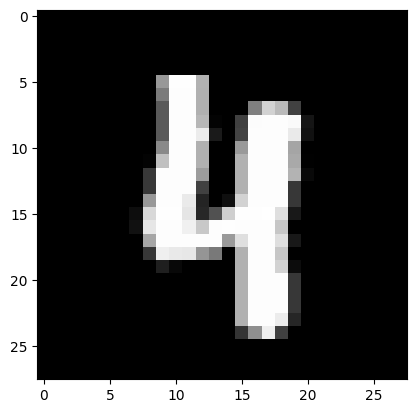

In [8]:
myNN.test_prediction(99, X_train, Y_train)